# Deep Learning with Python

In this portfolio we will be constructing a neural network which can classify datasets.


## Big Dave vs Iris Dataset

We will begin with our old friend the iris dataset, which is a simple dataset with 4 features and 3 classes. 

In [1]:
# Import Packages
import numpy as np
import pandas as pd
import tensorflow as tf
# Import Data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X,y = load_iris(as_frame=True, return_X_y=True
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


2024-04-05 08:18:25.598078: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-05 08:18:25.599598: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-05 08:18:25.716433: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-05 08:18:26.201645: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-05 08:18:27.104140: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

We then convert our dataframe to a dataset for processing with tensorflow.

In [2]:
# Create Tensorflow Dataset
train = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values))
test = tf.data.Dataset.from_tensor_slices((X_test.values, y_test.values))

# Shuffle, duplicate and batch the data
train = train.shuffle(1000).repeat(10).batch(32)
test = test.batch(32)


2024-04-05 08:18:48.252221: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Now we can create our model, which we do by adding multiple layers to a `tf.sequential` model. We choose (arbitrarily) two dense layers and one output layer.

In [3]:
BigDave = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [4]:
BigDave.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

BigDave.fit(train, validation_data = test,epochs=5)

Epoch 1/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3252 - loss: 2.9850 - val_accuracy: 0.3667 - val_loss: 1.9569
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.3196 - loss: 1.8441 - val_accuracy: 0.3667 - val_loss: 1.1980
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.3227 - loss: 1.1219 - val_accuracy: 0.3667 - val_loss: 0.8113
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4052 - loss: 0.7859 - val_accuracy: 0.7000 - val_loss: 0.6595
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6543 - loss: 0.6453 - val_accuracy: 0.7000 - val_loss: 0.5876


Big Dave has been successfully trained, lets see his predictions on a few values of the test set.

In [5]:
import matplotlib.pyplot as plt

# Define three new data points
new_data1 = {'sepal length (cm)': 5, 'sepal width (cm)': 2.8, 'petal length (cm)': 3, 'petal width (cm)': 1.3}
new_data2 = {'sepal length (cm)': 6.2, 'sepal width (cm)': 3.4, 'petal length (cm)': 5.4, 'petal width (cm)': 2.3}
new_data3 = {'sepal length (cm)': 5.0, 'sepal width (cm)': 3.6, 'petal length (cm)': 1.4, 'petal width (cm)': 0.2}

# Convert the dictionaries to numpy arrays and reshape them
new_data1 = np.array(list(new_data1.values())).reshape(1, -1)
new_data2 = np.array(list(new_data2.values())).reshape(1, -1)
new_data3 = np.array(list(new_data3.values())).reshape(1, -1)

# Make predictions for the new data points
prediction1 = BigDave.predict(new_data1)
prediction2 = BigDave.predict(new_data2)
prediction3 = BigDave.predict(new_data3)

# Find the classes with the highest probability
predicted_class1 = np.argmax(prediction1)
predicted_class2 = np.argmax(prediction2)
predicted_class3 = np.argmax(prediction3)

colors = ['#FF7F7F', '#90EE90', '#ADD8E6']
# Plot the actual classifications for sepal length and sepal width
for i, class_ in enumerate(classes):
    data = X[y == class_]
    plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], color=colors[i], label=class_)

# Plot the predicted classifications for the new data points
plt.scatter(new_data3[0, 0], new_data3[0, 1], color='#8B0000', label=f'Predicted: {predicted_class3}')
plt.scatter(new_data1[0, 0], new_data1[0, 1], color='#006400', label=f'Predicted: {predicted_class1}')
plt.scatter(new_data2[0, 0], new_data2[0, 1], color='#00008B', label=f'Predicted: {predicted_class2}')
plt.legend()
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Sepal length vs Sepal width')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


NameError: name 'classes' is not defined

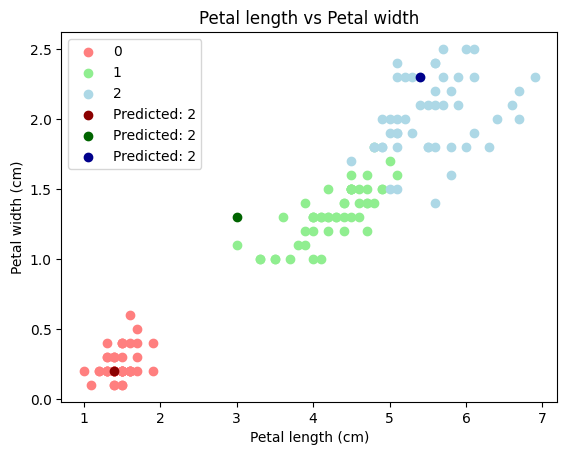

In [ ]:
# Plot the actual classifications for petal length and petal width
for i, class_ in enumerate(classes):
    data = X[y == class_]
    plt.scatter(data['petal length (cm)'], data['petal width (cm)'], color=colors[i], label=class_)

# Plot the predicted classifications for the new data points
plt.scatter(new_data3[0, 2], new_data3[0, 3], color='#8B0000', label=f'Predicted: {predicted_class3}')
plt.scatter(new_data1[0, 2], new_data1[0, 3], color='#006400', label=f'Predicted: {predicted_class1}')
plt.scatter(new_data2[0, 2], new_data2[0, 3], color='#00008B', label=f'Predicted: {predicted_class2}')

plt.legend()
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Petal length vs Petal width')
plt.show()

Big Dave is so smart! Although lets be honest we are only using the iris dataset, which is proper easy to classify, in fact I've done it with a simple 1-step clustering algorithm before. Let's try something a bit more challenging, the MNIST dataset.

## Big Dave vs MNIST Dataset

The MNIST dataset is a dataset of 28x28 pixel images of handwritten digits. We will load the dataset and preprocess it in the same way as the iris dataset. Unfortunately we will need to make modifications to Daves structure to take in (28,28) input and output 10 classes.

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8726 - loss: 0.4431
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9635 - loss: 0.1208
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


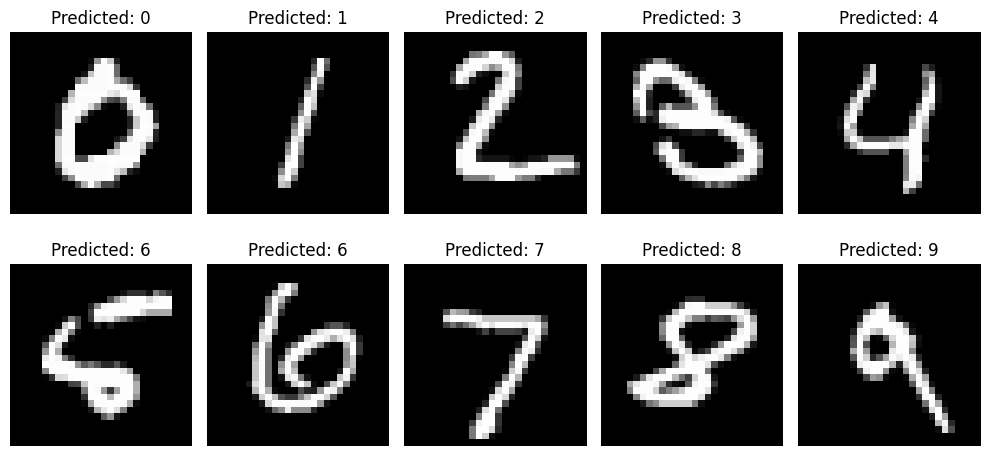

In [49]:
import tensorflow as tf
import random as rd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model

rd.seed(1234)
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0


#Construct dave layer by layer

BigDave2 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#COmpile Dave
BigDave2.compile(optimizer='adam', 
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])

#Train dave
BigDave2.fit(train_images, train_labels, epochs=2)
# Select an example of each digit
indices = [np.where(test_labels == i)[0][0] for i in range(10)]

#plot the examples
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flatten()):
    img = test_images[indices[i]].reshape(1, 28, 28)
    prediction = BigDave2.predict(img)
    ax.imshow(test_images[indices[i]], cmap='gray')
    ax.set_title(f'Predicted: {np.argmax(prediction)}')
    ax.axis('off')

plt.tight_layout()
plt.show()

What a guy! I'll admit that five is pretty rough anyway so I don't blame him for putting 6 there. This is still a 1 (hidden) layer network, but it still performs at 96% accuracy, lets reduce the number of nodes in the hidden layer to 64 and see how it performs.

In [51]:
BigDave2 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

BigDave2.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

BigDave2.fit(train_images, train_labels, epochs=2)


Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step - accuracy: 0.8399 - loss: 0.5816
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 813us/step - accuracy: 0.9419 - loss: 0.2076


Still quite considerable accuracy! Let's plot accuracy against the number of nodes in the hidden layer to see when drop off begins.

[ 10  20  30  40  50  60  70  80  90 100]
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 887us/step - accuracy: 0.7050 - loss: 0.9132
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 904us/step - accuracy: 0.9154 - loss: 0.2943
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.9175 - loss: 0.3003
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8151 - loss: 0.6650
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9329 - loss: 0.2387
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9362 - loss: 0.2215
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8350 - loss: 0.5982
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9408 - loss: 0.2111
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9445 - loss: 0.2030
Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8381 - loss: 0.5747
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9487 - loss: 0.1807
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s

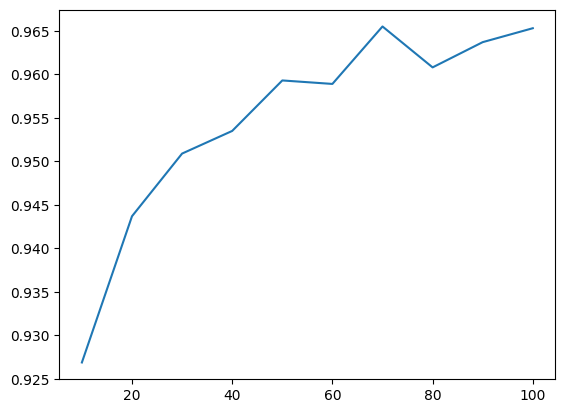

In [54]:
def BigDave_Gen(n):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(28,28)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(n, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

    return model

X = np.arange(10, 101, 10)
Y = []
print(X)
for n in X:
    model = BigDave_Gen(n)
    model.fit(train_images, train_labels, epochs=2)
    loss, accuracy = model.evaluate(test_images, test_labels)
    Y.append(accuracy)

plt.plot(X, Y)

